# Random Walk(Brownian motion)
ref:

https://scipy-lectures.org/intro/numpy/auto_examples/plot_randomwalk.html#sphx-glr-intro-numpy-auto-examples-plot-randomwalk-py
   
https://scipy-lectures.org/intro/numpy/operations.html#other-reductions

## 1D example

### Import libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Let us consider a simple 1D random walk process: at each time step a walker jumps right or left with equal probability.

We are interested in finding the typical distance from the origin of a random walker after t(time) left or right jumps? We are going to simulate many "walkers" to find this law, and we are going to do so using array computing tricks.

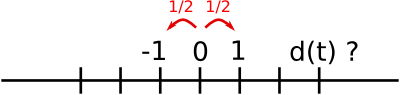

In [5]:
Project_Path = 'C:\\Users\\zhang\\OneDrive\\Desktop\\PHY494\\random-walk\\'
Image(filename=Project_Path + 'random_walk.png')


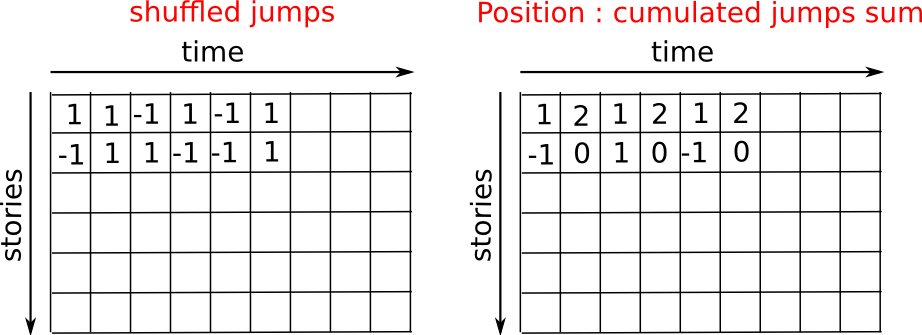

In [6]:
Image(filename=Project_Path + 'random_walk_schema.png')

### Initialize some constants

In [41]:
# We create 1000 realizations with 200 steps each
n_stories = 1000
t_max = 200

# Generate time steps
t = np.arange(t_max)

np.arange doc

https://numpy.org/doc/1.18/reference/generated/numpy.arange.html

In [42]:
print(np.arange(2,5))
print(np.arange(2,10,2,dtype=float))
print(np.arange(-0.1,0.5,0.1))

[2 3 4]
[2. 4. 6. 8.]
[-0.1  0.   0.1  0.2  0.3  0.4]


### Generate random steps

In [43]:
# Steps can be -1 or 1 (note that randint excludes the upper limit)
steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) - 1

print(steps)
print(np.shape(steps))

[[ 1  1 -1 ...  1  1 -1]
 [-1  1  1 ...  1 -1 -1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [-1  1  1 ...  1 -1 -1]
 [ 1 -1  1 ...  1 -1  1]
 [-1  1 -1 ...  1  1  1]]
(1000, 200)


np.random.randint doc

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

### Calculate cumulative sum 

In [44]:
# The time evolution of the position is obtained by successively
# summing up individual steps. This is done for each of the
# realizations, i.e. along axis 1.
positions = np.cumsum(steps, axis=1)

print(positions)

[[  1   2   1 ...  24  25  24]
 [ -1   0   1 ...  -8  -9 -10]
 [ -1  -2  -3 ...   0   1   2]
 ...
 [ -1   0   1 ...  -2  -3  -4]
 [  1   0   1 ...   0  -1   0]
 [ -1   0  -1 ... -16 -15 -14]]


np.cumsum doc

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html

### Calculate the mean square distance(MSD)

In [72]:
# Determine the time evolution of the mean square distance.
sq_distance = positions**2
mean_sq_distance = np.mean(sq_distance, axis=0)
print(mean_sq_distance[:10])
print(np.shape(mean_sq_distance))

[ 1.     1.98   3.072  3.964  4.88   6.14   7.08   8.096  9.12  10.092]
(200,)


### Plot the data

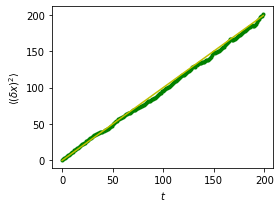

In [70]:
# Plot the distance d from the origin as a function of time and
# compare with the theoretically expected result.
plt.figure(figsize=(4, 3))
plt.plot(t, (mean_sq_distance), 'g.')
plt.plot(t,t,'y-')
plt.xlabel(r"$t$")
plt.ylabel(r"$\langle (\delta x)^2 \rangle$")
plt.tight_layout()


We find a well-known result in physics: the MSD grows linearly as the time!

### Linear fit on data

In [60]:
# with scipy
from scipy import optimize

def diff_fit(X, m, b):
    return m * X + b

In [62]:
params, params_covariance = optimize.curve_fit(diff_fit, t, mean_sq_distance, p0=[1, 1])
print(params)

[0.97509873 0.64509612]


scipy.optimize.curve_fit doc

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

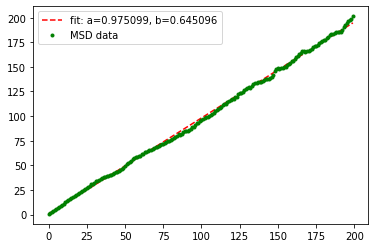

In [69]:
plt.plot(t, diff_fit(t, *params), 'r--', label='fit: a={0:f}, b={1:f}'.format(params[0],params[1]))
plt.plot(t, (mean_sq_distance), 'g.',label='MSD data')
plt.legend()
